In [1]:
import sys
sys.path.append('../')
sys.path.append('../../60_gebastel/Model/')

from helper import load_dotenv
from tqdm.auto import tqdm
from random import choices
from tile_postprocessing_tools import load_tile_classifier, classify_tile

In [2]:
dotenv = load_dotenv()

In [3]:
tiles = list(dotenv['TILE_DATASET_DIR'].glob('./*/moire/*.jpg'))
tiles = [t for t in tiles if t.parent.parent.name in ['train','test','val']]

In [4]:
clf = load_tile_classifier()

In [5]:
tiles_to_process = tiles #choices(tiles, k=10000)
tiles_to_remove = []

for t in tqdm(tiles_to_process):
    pred = classify_tile( t, clf )

    if pred == 'no_moire':
        tiles_to_remove.append(t)

  0%|          | 0/73016 [00:00<?, ?it/s]

In [ ]:
0 / 0

In [6]:
from PIL import Image

In [7]:
len(tiles_to_remove)

4664

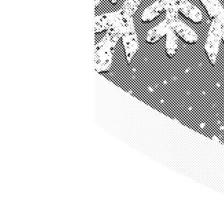

In [12]:
Image.open(choices(tiles_to_remove, k=1)[0])

In [13]:
for moire_path in tqdm(tiles_to_remove):
    non_moire_path = moire_path.parent.parent / 'no_moire' / moire_path.name

    if moire_path.exists():
        moire_path.unlink()
    
    if non_moire_path.exists():
        non_moire_path.unlink()

  0%|          | 0/4664 [00:00<?, ?it/s]